In [45]:
#Please note: Insights and summarization of points are done at the same place.

import pandas as pd
data = pd.read_excel("us_state_vaccinations.xlsx")
data.head()

#replaced the first cell of daily_vaccinations_raw, daily_vaccinations, daily_vaccinations_per_million with 0, since the change in values on the first day(base) is 0. 

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,0.0,0.0,0.0,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [47]:
import numpy as np 
from scipy import stats

print("*************** Check the datatypes ***************")
print(data.info())
print("\n")

print("*************** Check for null values and preprocess***************")
print(data.isnull().sum())
print("\n")

print("*************** Check for unique location values ***************")
print(data.location.unique())
#we're looking at state data only. so remove rows with location "United States"
data = data[data.location != "United States"]


print("\n\n\n\n")
print(data.location.unique())

#fill null values if data is not available for a day, take the previous day values.
#Reason: Given the assumptions in the readme file, we assume that doses changed equally on a daily basis over any periods in which no data was reported. 
data=data.fillna(method='ffill')
print(data.isnull().sum())
data.head()



*************** Check the datatypes ***************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7488 entries, 0 to 7627
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 7488 non-null   datetime64[ns]
 1   location                             7488 non-null   object        
 2   total_vaccinations                   7232 non-null   float64       
 3   total_distributed                    7122 non-null   float64       
 4   people_vaccinated                    7110 non-null   float64       
 5   people_fully_vaccinated_per_hundred  6660 non-null   float64       
 6   total_vaccinations_per_hundred       6748 non-null   float64       
 7   people_fully_vaccinated              7029 non-null   float64       
 8   people_vaccinated_per_hundred        6736 non-null   float64       
 9   distributed_per_hundred          

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,0.0,0.0,0.0,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.19,1.88,9245.0,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,7557.0,7498.0,1529.0,0.226


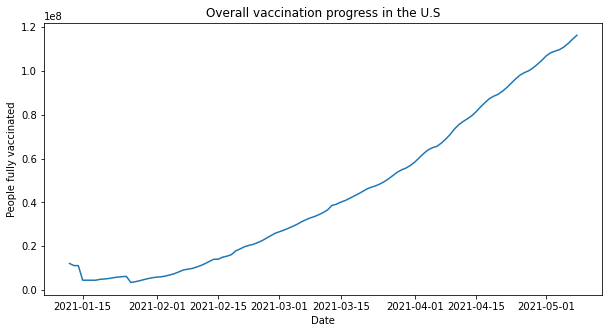

In [55]:
import matplotlib.pyplot as plt

df = data.groupby('date')['people_fully_vaccinated'].sum()
#df.head(50)


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.xlabel("Date")
plt.ylabel("People fully vaccinated")
plt.title("Overall vaccination progress in the U.S")

plt.plot(df)
plt.show()



## Insights:
### The above graph is the trend of fully vaccinated people in the U.S (with 2 doses). There is a steady increase in the trend. This means more people are getting their 2 doses of vaccines. This is almost a linear positive trend, suggesting further increase in the coming months. 

In [63]:
import plotly.express as px
fig = px.bar(data, 
             y = 'people_vaccinated_per_hundred',
             x = 'location',
             color = 'people_vaccinated_per_hundred',
             color_discrete_sequence= px.colors.sequential.Viridis_r
            )

fig.update_layout(
    title={
            'text' : "Vaccination till date in various states",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="State",
    yaxis_title="people_vaccinated_per_hundred",
    legend_title="Total people vaccinated per hundred"
)
fig.show()

## Insights:
###  One observation regarding the data  is that it has extra information other than the states. Long Term Care, Dept of Defense, Veterans Health, Bureau of Prisons are not states, but included.  The graph above does not take absolute values, as the populations of each state differ. It is more useful to take the number of people vaccinated per hundred to be able to compare between states. Republic of Palau has the highest people vaccinated, with a highest of 72.4 per 100. 

In [64]:

fig = px.line(data, x = 'date', y ='daily_vaccinations_per_million', color = 'location')
fig.update_layout(
    title={
            'text' :"Daily vaccination trend per million",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()

## Insights:
### The above graph shows the daily trend of vaccinations per million (dvpm). Republoc of Palau has the highest variation in the daily trends. Hawaii has the highest dvpm over the whole time period, peaking in mid April 2021. While at the start of vaccinations Arkansas has the highest dvpm, Hawaii has the highest at April end. However, Arkansas has an immediate,steep decline after mid January. We see an increasing trend in the daily vaccinations in Hawaii with time. Dept of Defense and the other non-state categories have a constant dvpm trend throughout. Alaska, Arizona have shown a decline in the dvpm from mid April.

In [66]:

fig = px.line(data, x = 'date', y ='share_doses_used', color = 'location')
fig.update_layout(
    title={
            'text' :"Daily share of doses used",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily share of doses used"
)
fig.show()

## Insights:
### The above graph shows the daily share of doses used in comparison to the total distribution of vaccines. All states show a similar trend in the use of vaccines. The increase till mid Feb, and almost have a similar range of share threafter. However, Bureau of Prisons almost always uses maximum of vaccines distributed. Marshall Islands and Federated States of Micronesia use the least of the distributed vaccines. 

In [123]:
#bonus question
data = pd.read_csv("United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
data.head()

data = data[['submission_date','state','new_case','new_death']]
data.head()

print("*************** Check for null values***************")
print(data.isnull().sum())
print("\n")


*************** Check for null values***************
submission_date    0
state              0
new_case           0
new_death          0
dtype: int64




In [124]:
df = data.dropna(axis = 0).groupby(by = ['submission_date']).sum().reset_index()
print(df.head())
print("\n\n")
print(df.info())

  submission_date  new_case  new_death
0      01/01/2021    153921       2862
1      01/02/2021    241676       2726
2      01/03/2021    193288       2388
3      01/04/2021    210539       2742
4      01/05/2021    264696       3716



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  495 non-null    object
 1   new_case         495 non-null    int64 
 2   new_death        495 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.7+ KB
None


In [144]:
#convert submission date to date format. This becomes easier while plotting. 
df['submission_date']= pd.to_datetime(df['submission_date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  495 non-null    datetime64[ns]
 1   new_case         495 non-null    int64         
 2   new_death        495 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.7 KB


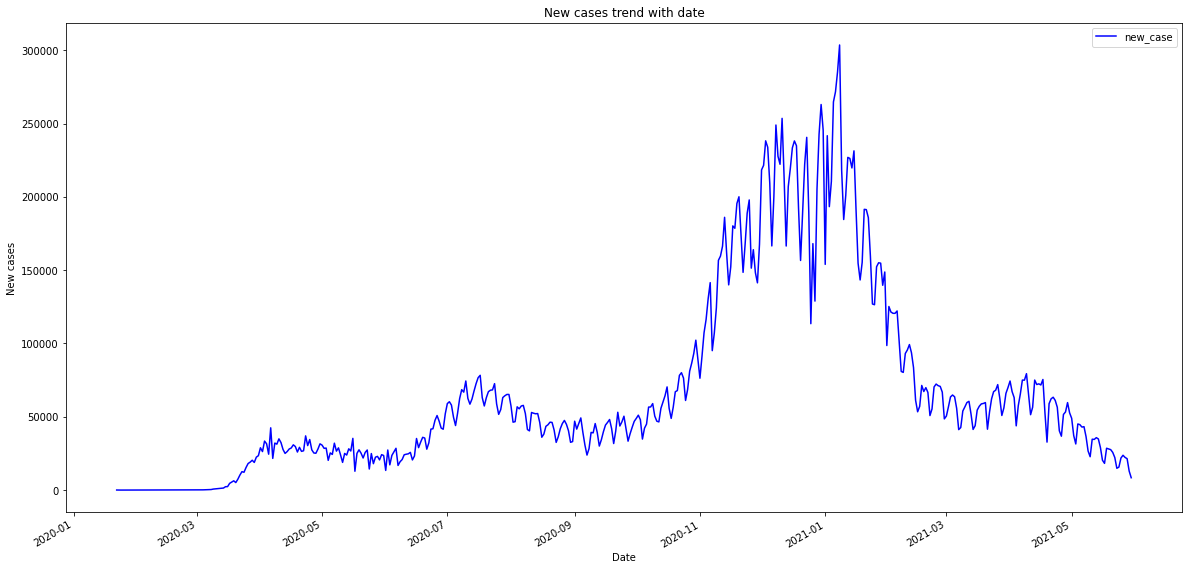

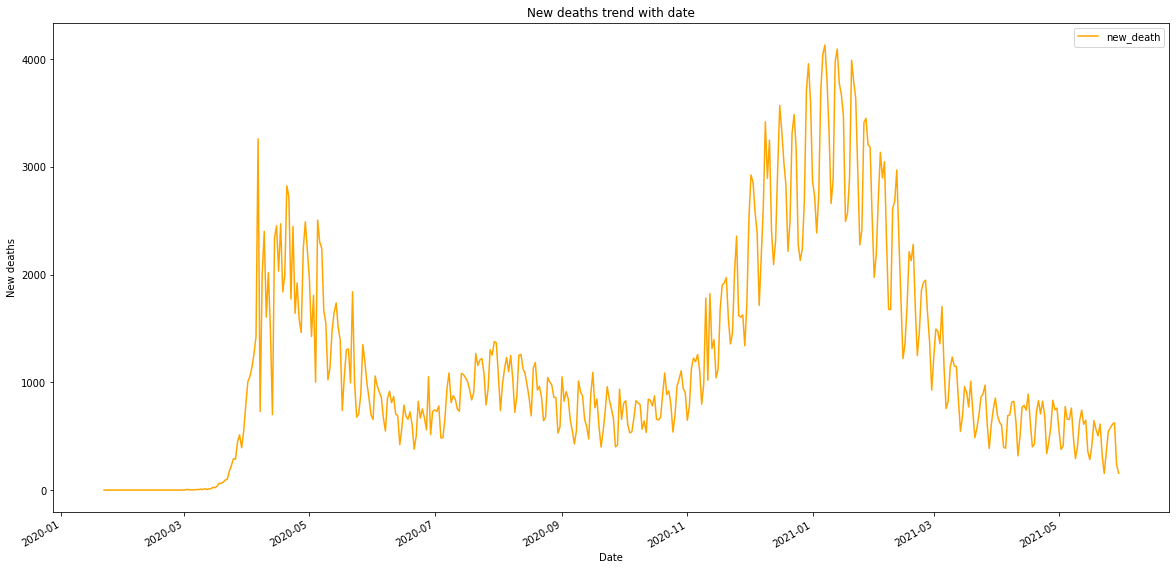

In [148]:

p=df.plot(x='submission_date', y=['new_case'],figsize=(20,10),color="blue", title = "New cases trend with date")
p.set_xlabel("Date")
p.set_ylabel("New cases")
plt.show()

p=df.plot(x='submission_date', y=['new_death'],figsize=(20,10),color="orange",title = "New deaths trend with date")
p.set_xlabel("Date")
p.set_ylabel("New deaths")
plt.show()

## Insights:
### We have vaccination date (from the previous dataset) from about second week of January 2021. So I assume that the vaccinations are in effect from seconf week of Jan 2021. The above two graphs show the trends in new cases and new deaths. Both the new cases and deaths follow a similar pattern throughout. So we can say that the number of new cases and deaths are strongly positively correlated to each other. The above graphs show the effectiveness of the vaccine. At first after the taking the vaccine, the cases and deaths have a similar pattern as before taking vaccines. But around February 2021, the cases and deaths have dropped significantly. This suggests that the vaccine is working against COVID virus, which is a good sign. We can also see that at the end, the significant decrease in the deaths and new cases slowly came to a steady pattern. Overall, we can say that the vaccine is effective.